### Implementing Neural Network with Scikit-Learn

In this micro Project we will try to build neural network that predicts the outcome of diabets. We will use Python's Scikit-Learn library to create our neural network that performs this classification task.

Let's jump straight to the code. The first step is to import this dataset into our program. To do so, we will use Python's pandas library.

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [37]:
#load dataset
dat = pd.read_csv('../machine/diabetes.csv')
dat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploratory Data Analysis

In [5]:
# list of columns 
list(dat)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [7]:
dat.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [38]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [39]:
# count outcome
dat['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

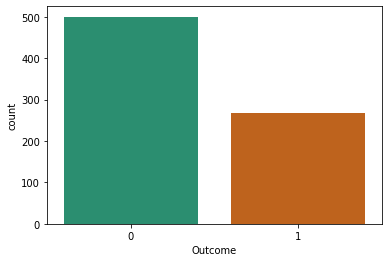

In [42]:
# countplot outcome
sns.countplot(x='Outcome',data=dat, palette='Dark2')
plt.show()

In [8]:
dat.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Preprocessing

The next step is to divide the data into attributes and labels

In [19]:
# SeparateOutcome from training features 
y = dat.Outcome
X = dat.drop('Outcome', axis=1)

### Train Test Split
To avoid over-fitting, we will divide our dataset into training and test splits. The training data will be used to train the neural network and the test data will be used to evaluate the performance of the neural network. This helps with the problem of over-fitting because we're evaluating our neural network on data that it has not seen (i.e. been trained on) before.

To create training and test splits, execute the following script:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

The above script splits 80% of the dataset into our training set and the other 20% in to test data.

### Feature Scaling
Before making actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated. Feature scaling is performed only on the training data and not on test data. This is because in real world, data is not scaled and the ultimate purpose of the neural network is to make predictions on real world data. Therefore, we try to keep our test data as real as possible.

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


The following script performs feature scaling:

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Training and Predictions
And now it's finally time to do what you have been waiting for, train a neural network that can actually make predictions.

In [32]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

The final step is to make predictions on our test data

In [33]:
predictions = mlp.predict(X_test)

### Evaluating the Algorithm
We created our algorithm and we made some predictions on the test dataset. Now is the time to evaluate how well our algorithm performs. To evaluate an algorithm, the most commonly used metrics are a confusion matrix, precision, recall, and f1 score. The confusion_matrix and classification_report methods of the sklearn.metrics library can help us find these scores. The following script generates evaluation report for our algorithm:

In [36]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

0.7727272727272727
[[88 19]
 [16 31]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       107
           1       0.62      0.66      0.64        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.78      0.77      0.77       154



You can see from the confusion matrix that our neural network only misclassified 16 outcome of the 154 diabets we tested the network on. Also, the f1 score of 0.77.